In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

C:\Users\santh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
df = pd.read_csv(r'C:\Users\santh\Downloads\archive (2)/personality.csv')

In [8]:
df.head(5)

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,...,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,...,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3


In [9]:
df.shape

(1834, 34)

In [10]:
df.describe()

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,movie_1,predicted_rating_1,movie_2,predicted_rating_2,movie_3,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
count,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,...,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000
mean,5.376499,4.215921,4.561614,4.662486,3.485551,45669.233915,4.362927,50656.360414,4.322496,51791.061069,...,39458.009269,4.302993,38493.352236,4.301880,39280.998909,4.300609,38871.924755,4.302449,3.056707,3.517993
std,1.042804,1.137923,1.392548,1.311450,1.468503,46612.744107,0.383549,46669.152356,0.378746,46172.769718,...,44511.776921,0.380281,43444.149855,0.383848,43446.111523,0.378476,43486.579385,0.378439,1.078507,1.059060
min,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,2.510682,1.000000,2.423497,6.000000,...,1.000000,2.483215,1.000000,2.799538,1.000000,2.375510,1.000000,2.313341,1.000000,1.000000
25%,4.500000,3.500000,3.500000,4.000000,2.500000,2019.000000,4.110614,3307.750000,4.084125,3031.250000,...,1766.750000,4.049153,1302.000000,4.059146,1466.000000,4.052558,1256.000000,4.050181,2.000000,3.000000
50%,5.500000,4.000000,4.500000,4.500000,3.500000,17392.000000,4.355815,44377.000000,4.320721,48780.000000,...,7156.000000,4.307194,6964.000000,4.294702,7505.000000,4.299400,7361.000000,4.305078,3.000000,4.000000
75%,6.000000,5.000000,5.500000,5.500000,4.500000,94466.000000,4.618449,96606.000000,4.556173,95311.000000,...,84847.000000,4.545671,81847.000000,4.539686,81845.000000,4.549493,82069.000000,4.550886,4.000000,4.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,140737.000000,6.563889,136445.000000,6.585588,141761.000000,...,140359.000000,6.606617,134853.000000,7.345432,142115.000000,6.530355,139195.000000,6.574597,5.000000,5.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userid                1834 non-null   object 
 1    openness             1834 non-null   float64
 2    agreeableness        1834 non-null   float64
 3    emotional_stability  1834 non-null   float64
 4    conscientiousness    1834 non-null   float64
 5    extraversion         1834 non-null   float64
 6    assigned metric      1834 non-null   object 
 7    assigned condition   1834 non-null   object 
 8    movie_1              1834 non-null   int64  
 9    predicted_rating_1   1834 non-null   float64
 10   movie_2              1834 non-null   int64  
 11   predicted_rating_2   1834 non-null   float64
 12   movie_3              1834 non-null   int64  
 13   predicted_rating_3   1834 non-null   float64
 14   movie_4              1834 non-null   int64  
 15   predicted_rating_4  

In [13]:

columns_names = {' openness': 'openness', ' agreeableness': 'agreeableness', ' emotional_stability': 'emotional_stability',
               ' conscientiousness': 'conscientiousness', ' extraversion': 'extraversion', ' assigned metric': 'assigned metric',
               ' assigned condition': 'assigned condition', ' is_personalized': 'is_personalized', ' enjoy_watching ': 'enjoy_watching'}
df = df.rename(columns=columns_names)

In [14]:
df['assigned metric'] = df['assigned metric'].replace([' serendipity'], 'serendipity')
df['assigned metric'] = df['assigned metric'].replace([' popularity'], 'popularity')
df['assigned metric'] = df['assigned metric'].replace([' diversity'], 'diversity')
df['assigned condition'] = df['assigned condition'].replace([' low'], 'low')
df['assigned condition'] = df['assigned condition'].replace([' medium'], 'medium')
df['assigned condition'] = df['assigned condition'].replace([' high'], 'high')

In [15]:
df.head(5)

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,...,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,...,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3


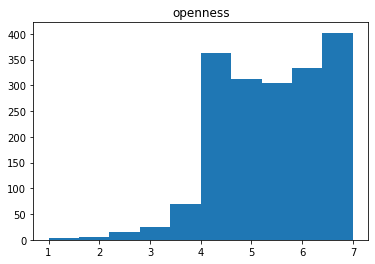

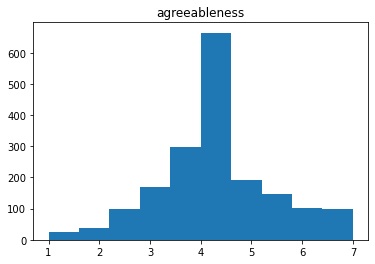

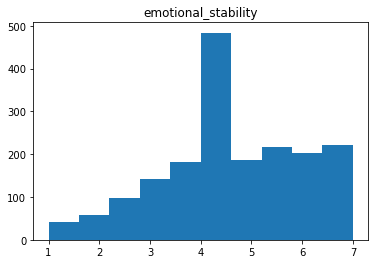

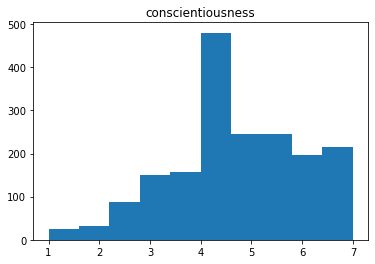

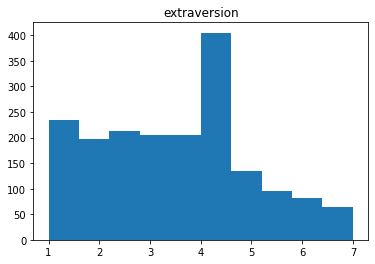

In [16]:
personality = ['openness', 'agreeableness', 'emotional_stability', 'conscientiousness', 'extraversion']

for i in personality:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

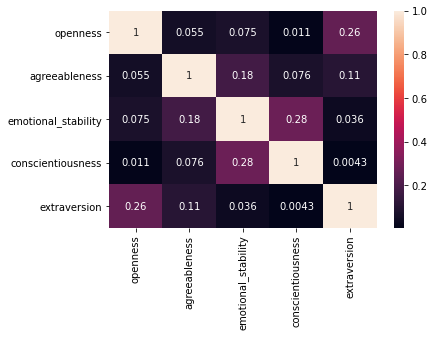

In [17]:
sns.heatmap(df[personality].corr(), annot = True)